## Project 1. 게임 설계를 위한 데이터 분석

### 필수 목표
- 지역에 따라서 선호하는 게임 장르가 다를까
- 연도별 게임의 트렌드가 있을까
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

먼저, 분석에 앞서 데이터를 로드하여 살펴보자!

In [2]:
df = pd.read_csv("./vgames2.csv")

In [3]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# .info() 함수로 대략적으로 살펴보자
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


대충 봤을때 일단
1. 출고량의 단위가 다르다
2. 출고량이 object로 되어있다
3. null 값이 존재한다

의 문제가 있는 것으로 보인다.

(연도의 경우, 분석의 편의성을 위해 변수형으로 일단 두기로 했다)

또한 위 데이터셋에서 출고량의 단위가 나와있지 않아, 비슷한 데이터를 안내하고 있는 kaggle의 데이터셋 설명을 참고했더니

![image](https://user-images.githubusercontent.com/33304926/153751319-f9a26922-2ec1-4412-ad9e-e5b0afc3035d.png)

만 단위(million)를 기준으로 함을 알 수 있다.

또한, 뒤에 K가 붙은 데이터들이 있는데 여기서 k는 만을 나타낸다.
예를 들어, 1.3K면 13,000을 의미하는 것이다.
따라서 이에 대해 단위를 모두 동일하게 통일해주고,
다시 int로 변환하는 과정을 거쳐야 할 것 같다.


위 kaggle 데이터셋에 대한 설명은 정말 감사하게도, 우리 12기분들이 general에서 도와주셨다. 감사합니다!!


출처: https://www.kaggle.com/gregorut/videogamesales



## 데이터 전처리
### 1-1. na 값 알아보고 대체 or 제거하기

In [5]:
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

전체 데이터수는 16598개고, na값을 모두 제거하면 약 371개정도의 데이터가 삭제되므로

일단 과감하게 na 데이터가 있는 행을 모두 지우고 데이터 분석을 진행해보기로 하였다

In [6]:
# 먼저, 알 수 없는 젤 첫 행 (Unnamed: 0)을 지우자
df = df.drop(['Unnamed: 0'], axis = 'columns')

In [7]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
# 결측치가 있는 행 제거
df = df.dropna(axis = 0)
df = df.reset_index(drop=True)

In [9]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1-2. 출고량 단위 통일

In [10]:
def toInt(string):
    # K는 1000을 의미함
    # K 가 있는 데이터의 경우 -> 1,000에 K를 제거한 값을 곱해줌
    if "K" in string:
        a = string.replace('K','')
        return 1000 * float(a)
        
    # M은 백만을 의미함
    # M이 있는 데이터의 경우 -> 1,000,000에 M을 제거한 값을 곱해줌
    elif "M" in string:
        a = string.replace('M', '')
        return 1000000 * float(a)
    
    # K나 M이 없는 데이터의 경우 -> M과 동일
    # 1,000,000에 float로 치환한 값을 곱해줌
    else:
        return 1000000 * float(string)

In [11]:
df['NA_Sales'] = df['NA_Sales'].apply(toInt)

In [12]:
df['EU_Sales'] = df['EU_Sales'].apply(toInt)

In [13]:
df['JP_Sales'] = df['JP_Sales'].apply(toInt)

In [14]:
df['Other_Sales'] = df['Other_Sales'].apply(toInt)

In [15]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [17]:
pd.set_option('display.max_row', 500)

### 1-3. 년도 단위 통일

In [18]:
# 년도 점검

df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
11.0        10
9.0         10
8.0         10
1980.0       8
6.0          7
10.0         7
3.0          7
15.0         5
16.0         5
95.0         4
5.0          4
4.0          4
2.0          3
0.0          3
96.0         3
7.0          3
98.0         3
2017.0       3
13.0         2
12.0         2
1.0          2
14.0         2
97.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, dtype: int64

년도도 살펴보면 두자리수로 표현된 년도가 있기 때문에, 이를 4자리수로 다시 계산하기로 했다.

In [19]:
def year_change(n):
    # 50이하의 2자리수: 2000을 더해준다
    if n < 50:
        return 2000 + n
        
    # 50보다 크고 100보다 작을 때: 1900을 더해준다
    elif n > 50 and  n <= 99:
        return 1900 + n
    
    # 둘 다 아니면 그냥 원래 숫자를 리턴
    else:
        return n

In [20]:
df['Year'] = df['Year'].apply(year_change)

In [21]:
df['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [22]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


이로서, 형변환도 끝났고 na값을 모두 제거하였으며, 년도도 정리해두었다.
이제부터 이 데이터를 가지고 분석을 진행해보자!

## 필수분석 1. 지역에 따라서 선호하는 게임 장르가 다를까

이를 알기 위해선, 북미, 유럽, 일본, 기타 지역의 판매량과 장르를 비교해야 할 듯 하다.

먼저, 분석을 위해 4개의 판매량과 장르만 따로 빼서 dataframe을 생성해보았다.

In [23]:
df1 = df[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

In [24]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40000.0,0.0,0.0,0.0
1,Action,170000.0,0.0,0.0,10000.0
2,Adventure,0.0,0.0,20000.0,0.0
3,Misc,40000.0,0.0,0.0,0.0
4,Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...
16236,Platform,150000.0,40000.0,0.0,10000.0
16237,Action,10000.0,0.0,0.0,0.0
16238,Sports,440000.0,190000.0,30000.0,130000.0
16239,Action,50000.0,50000.0,250000.0,30000.0


그 뒤, 장르별 판매량을 지역별로 나타내보았다.

In [25]:
df1_1 = df1.groupby('Genre').sum()

In [26]:
df1_1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


과연 장르별 판매량이 지역에 따라 다를까?

이를 알아보기 위해 위의 결과를 판매량에 따라 내림차순으로 1~12위로 나타내보았다.

In [27]:
df1_2 = df1.groupby('Genre').sum().rank(ascending=False)

In [28]:
df1_2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,1.0,1.0,2.0,1.0
Adventure,11.0,10.0,10.0,10.0
Fighting,8.0,9.0,6.0,8.0
Misc,5.0,5.0,5.0,5.0
Platform,4.0,6.0,4.0,7.0
Puzzle,10.0,11.0,9.0,11.0
Racing,6.0,4.0,8.0,4.0
Role-Playing,7.0,7.0,1.0,6.0
Shooter,3.0,3.0,12.0,3.0


순위를 비교해보면, 북미, 유럽, 기타지역 에서의  Action, Sports, Shooter장르 판매량이 각각 1, 2, 3위를 차지하였다.

그러나 일본의 경우, 1위는 Role-Playing, 2위는 Action, 3위는 Sports 장르로 나타났다.

결과를 간단하게 라인 그래프로 나타내보았다. 

만약 지역별로 선호하는 장르가 같다면(유사하다면), 라인 그래프에서 겹치는 부분이 상당수 있을 것이라 생각했기 때문이다.

<AxesSubplot:xlabel='Genre'>

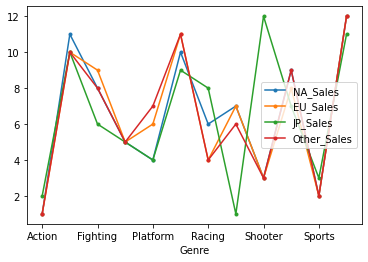

In [29]:
df1_2.plot(marker='o', ms=3)

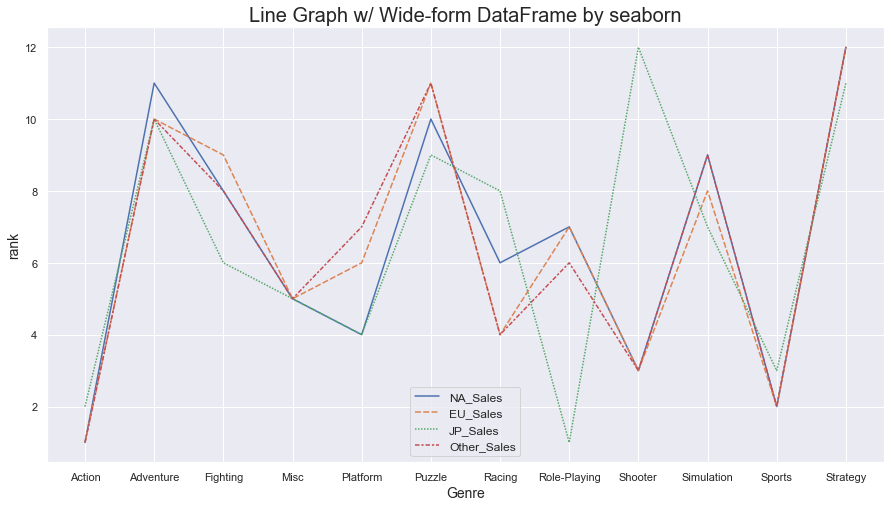

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})

p = sns.lineplot(data=df1_2)

plt.title('Line Graph w/ Wide-form DataFrame by seaborn', fontsize=20)

plt.ylabel('rank', fontsize=14)

plt.xlabel('Genre', fontsize=14)

plt.legend(fontsize=12, loc='best')

# plt.figure(figsize = (60,35))

plt.show()

그 결과, 지역별로 약간의 차이는 있지만, 겹치는 부분이 꽤 존재함을 알 수 있다.

단, 일본(연두색 점선)의 경우, 다른 그래프들과 크게 차이나는 부분이 존재함이 보인다(Role-Playing, Shooter)

이걸 좀 더 쉽게 알아볼 수 있게, 각 나라별로 판매량이 높은 장르를 내림차순으로 보여주도록 하였다.

In [31]:
df1_NA = df1_2[['NA_Sales']]
df1_EU = df1_2[['EU_Sales']]
df1_JP = df1_2[['JP_Sales']]
df1_OS = df1_2[['Other_Sales']]

In [32]:
df1_NA = df1_NA.sort_values(by='NA_Sales' ,ascending=True)
df1_EU = df1_EU.sort_values(by='EU_Sales' ,ascending=True)
df1_JP = df1_JP.sort_values(by='JP_Sales' ,ascending=True)
df1_OS = df1_OS.sort_values(by='Other_Sales' ,ascending=True)

In [33]:
index_na = df1_NA.index
index_eu = df1_EU.index
index_jp = df1_JP.index
index_os = df1_OS.index

In [34]:
df1_NA['NA_Sales'] = index_na
df1_EU['EU_Sales'] = index_eu
df1_JP['JP_Sales'] = index_jp
df1_OS['Other_Sales'] = index_os

In [35]:
df1_NA = df1_NA.reset_index(drop=True)
df1_EU = df1_EU.reset_index(drop=True)
df1_JP = df1_JP.reset_index(drop=True)
df1_OS = df1_OS.reset_index(drop=True)

In [36]:
result1 = pd.concat([df1_NA, df1_EU, df1_JP, df1_OS], axis=1)

In [37]:
result1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Action,Role-Playing,Action
1,Sports,Sports,Action,Sports
2,Shooter,Shooter,Sports,Shooter
3,Platform,Racing,Platform,Racing
4,Misc,Misc,Misc,Misc
5,Racing,Platform,Fighting,Role-Playing
6,Role-Playing,Role-Playing,Simulation,Platform
7,Fighting,Simulation,Racing,Fighting
8,Simulation,Fighting,Puzzle,Simulation
9,Puzzle,Adventure,Adventure,Adventure


위 표는 지역별로 판매량이 높은 장르를 내림차순으로 정리한 것이다.

표를 보면, 북미와 유럽, 기타의 경우 상위3개에 나타난 장르의 차이가 없지만

일본의 경우, Role-Playing 장르가 특히 선호된다는 사실을 알 수 있다.

또한, 일본의 경우, 타 지역에선 상위권에 위치한 Shooter 장르가 하위에 머무른다는 사실을 발견할 수 있다.

### 결론: 나머지 지역은 선호하는 게임이 유사하지만, 일본의 경우 특히 Role-Playing 장르를 선호함이 나타난다.

## 필수분석 2. 연도별 게임의 트렌드가 있을까?

이 분석을 진행하기 전, 트렌드가 뭘까? 고민하였다.

고민 끝에, 트렌드라 함은 __Genre__ 와 __Platform__ 이라 할 수 있다고 생각하였다.

그 해에 어떤 장르가 유행했는지,

어떤 플랫폼 게임이 유행했는지를 파악할 수 있지 않을까 생각했다.

먼저, 분석을 위해 연도와 장르, 연도와 플랫폼을 따로 뺐다

In [38]:
df2_1 = df[["Year", "Genre"]]
df2_2 = df[["Year", "Platform"]]

In [39]:
df2_1

,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
...,...,...
16236,2006.0,Platform
16237,2005.0,Action
16238,2015.0,Sports
16239,2013.0,Action


In [40]:
df2_2

,Year,Platform
0,2008.0,DS
1,2009.0,Wii
2,2010.0,PSP
3,2010.0,DS
4,2010.0,PS3
...,...,...
16236,2006.0,GC
16237,2005.0,PSP
16238,2015.0,PS3
16239,2013.0,PSV


별건 아니지만, 먼저 전체적으로 게임이 출시된 빈도수를 확인해보기 위해

년도별로 몇 개의 게임이 출시됬는지를 알아보았다.

In [41]:
df2_1['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

<AxesSubplot:>

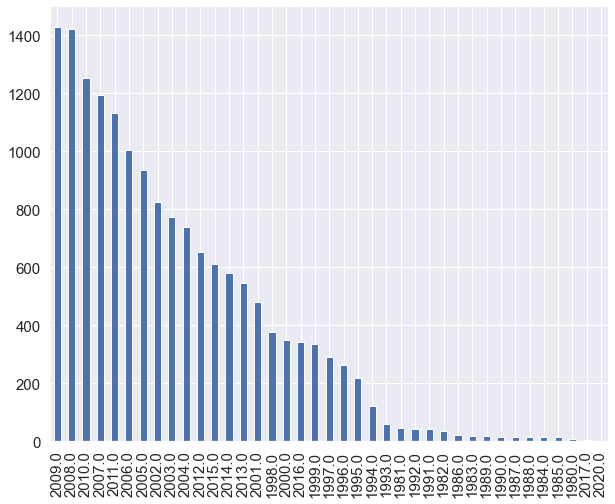

In [42]:
CountStatus = pd.value_counts(df2_1['Year'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)

<AxesSubplot:>

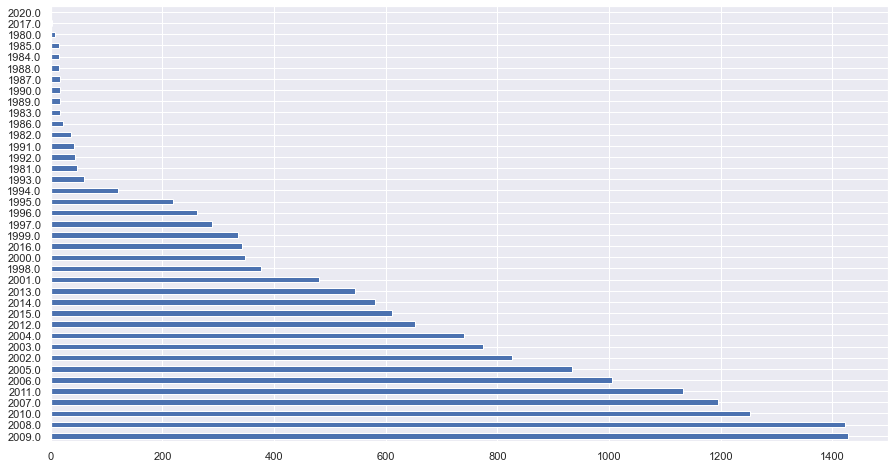

In [43]:
df2_1['Year'].value_counts().plot(kind='barh')

그래프를 보면, 2000년대 후반(2006 ~ 2010)에 게임이 가장 많이 출시되었고,

그 뒤를 2010년대 초반(2011 ~ 2015), 2000년대 초반(2000 ~ 2005) 이 이었다.

이번엔 경향을 알아보기 위해 년도별로 순차적으로 나타나게 하였다.

<AxesSubplot:>

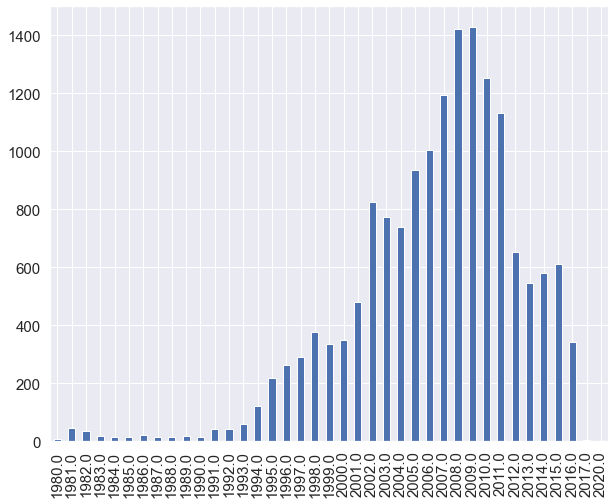

In [44]:
CountStatus = pd.value_counts(df2_1['Year'].values).sort_index(ascending=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)

게임 발매량은 1993년부터 상승하여 2008, 2009년에 최고치를 찍었다 이후 조금씩 감소되는 경향을 보였다.

이번엔 특정 년도에 어떤 장르가 가장 유행했는지를 알아보도록 하자.

In [45]:
freq = df2_1.groupby(['Year', 'Genre']).size()
freq

Year    Genre       
1980.0  Action            1
        Fighting          1
        Misc              4
        Shooter           2
1981.0  Action           25
        Platform          3
        Puzzle            2
        Racing            1
        Shooter          10
        Simulation        1
        Sports            4
1982.0  Action           18
        Misc              1
        Platform          5
        Puzzle            3
        Racing            2
        Shooter           5
        Sports            2
1983.0  Action            7
        Adventure         1
        Misc              1
        Platform          5
        Puzzle            1
        Shooter           1
        Sports            1
1984.0  Action            1
        Misc              1
        Platform          1
        Puzzle            3
        Racing            3
        Shooter           3
        Sports            2
1985.0  Action            2
        Fighting          1
        Platform          4

언듯 봤을때, 특정 년도 이전엔 그 장르가 없던 년도도 있다. 

이 결과 중, 해당 년에 가장 유행한 장르만 추출해보도록 하자.

In [46]:
df2_1g = df2_1.groupby(['Year', 'Genre']).size().reset_index(name='Size')
df2_1g

,Year,Genre,Size
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
5,1981.0,Platform,3
6,1981.0,Puzzle,2
7,1981.0,Racing,1
8,1981.0,Shooter,10
9,1981.0,Simulation,1


In [47]:
df2_1g_f = df2_1g.sort_values(by=['Size'], ascending=False).drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)

In [48]:
df2_1g_f.sort_values(by=['Year'], ascending=True).reset_index(drop = True)

,Year,Genre,Size
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Puzzle,3
5,1985.0,Puzzle,4
6,1986.0,Action,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


위 표를 살펴보면, 1996년 ~ 2002년까지 Sports 장르가 유행한 것을 알 수 있으며

2003 ~ 2016년까지 Action장르가 유행한 사실을 알 수 있다.

이제 같은 방식으로 플랫폼도 분석해 보자.

In [49]:
df2_2g = df2_2.groupby(['Year', 'Platform']).size().reset_index(name='Size')
df2_2g

,Year,Platform,Size
0,1980.0,2600,8
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1983.0,NES,6
5,1984.0,2600,1
6,1984.0,NES,13
7,1985.0,2600,1
8,1985.0,DS,1
9,1985.0,NES,11


In [50]:
df2_2g_f = df2_2g.sort_values(by=['Size'], ascending=False).drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)

In [51]:
df2_2g_f.sort_values(by=['Year'], ascending=True).reset_index(drop = True)

,Year,Platform,Size
0,1980.0,2600,8
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1984.0,NES,13
5,1985.0,NES,11
6,1986.0,NES,19
7,1987.0,NES,10
8,1988.0,NES,11
9,1989.0,GB,10


그 결과, 게임 플랫폼은 장르와 달리, 1980년부터 꾸준히 일정한 트렌드가 있음을 알 수 있다.

- 1980 ~ 1983: 아타리 2600
- 1984 ~ 1990: NES(Nintendo Entertainment System). 단, 1989년엔 GB(Game Boy)
- 1991 ~ 1994: SNES(Super Nintendo Entertainment System)
- 1995 ~ 2000: PS(PlayStation)
- 2001 ~ 2006: PS2(PlayStation 2)
- 2007 ~ 2010: DS(Nintendo DS)
- 2011 ~ 2014: PS3(PlayStation 3)
- 2015 ~ 2016: PS4(PlayStation 4)
- 2017: PSV(PlayStation Vita)
- 2020: DS(Nintendo DS)


### 결론: 연도에 따라 장르와 플랫폼에 트렌드가 존재한다.(자세한건 분석결과 참고)

## 필수분석3: 출고량(판매량)이 높은 게임에 대한 분석 및 시각화 프로세스

출고량이 무엇인가?

출고량이라함은 생산자가 생산품을 공장 등에서 시장에 낸 양을 말한다!(출처: Oxford Languages)

그렇다면 판매량과는 무슨 관계인가? 

엄밀히 따지면 판매량은 실제로 팔린 수량을 말하기 때문에 출고량과는 차이가 있다!

하지만 이 데이터에서 출고량이라고 할만한 데이터는 판매량밖에 없기 때문에

판매량 = 출고량으로 간주하고 분석을 진행하였다!

앞서 사용한 df를 다시 불러오자

In [52]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


출고량(판매량)이 높은 게임 순으로 정렬해보자!

그러기 위핸 옆에 북미 + 유럽 + 일본 + 기타 판매량을 모두 더한 컬럼을 추가해줘야 한다!

In [53]:
df['Sales_sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [54]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [55]:
# 전체 판매량이 많은 순으로 정렬

df_sorted_by_values = df.sort_values(by='Sales_sum' ,ascending=False)

In [56]:
df_sorted_by_values

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
8659,Double Sequence: The Q-Virus Invasion,DS,2008.0,Puzzle,Zoo Digital Publishing,10000.0,0.0,0.0,0.0,10000.0
2823,Command & Conquer Collection,PC,2003.0,Strategy,Electronic Arts,10000.0,0.0,0.0,0.0,10000.0
2837,Red Ninja: End of Honor,XB,2005.0,Action,Vivendi Games,10000.0,0.0,0.0,0.0,10000.0
11632,Grand Prix Legends,PC,1997.0,Racing,Vivendi Games,0.0,10000.0,0.0,0.0,10000.0


출고량이 높은 게임 top 10을 뽑아 시각화를 진행하기로 하였다.


### 3-1: 출고량이 높은 게임 top 10

In [57]:
df_top10 = df_sorted_by_values.head(10).reset_index(drop=True)

In [58]:
df_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
5,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


### 3-2: 출고량 비교

In [59]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

Text(0, 0.5, 'Sales_sum(단위: 천만)')

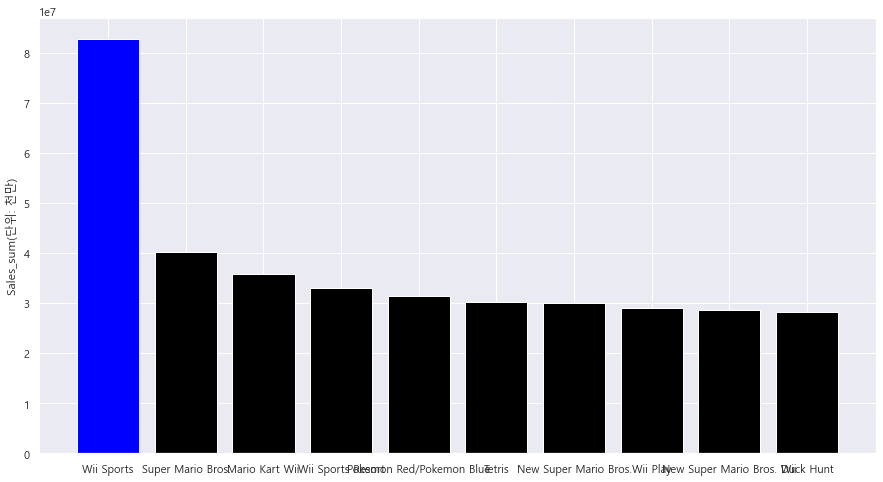

In [60]:
colors = ['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

plt.bar(df_top10['Name'],df_top10['Sales_sum'], color = colors)

plt.ylabel('Sales_sum(단위: 천만)')

중간에 글씨가 길어 겹치기 때문에 x축 라벨의 폰트 사이즈를 조절하였다.

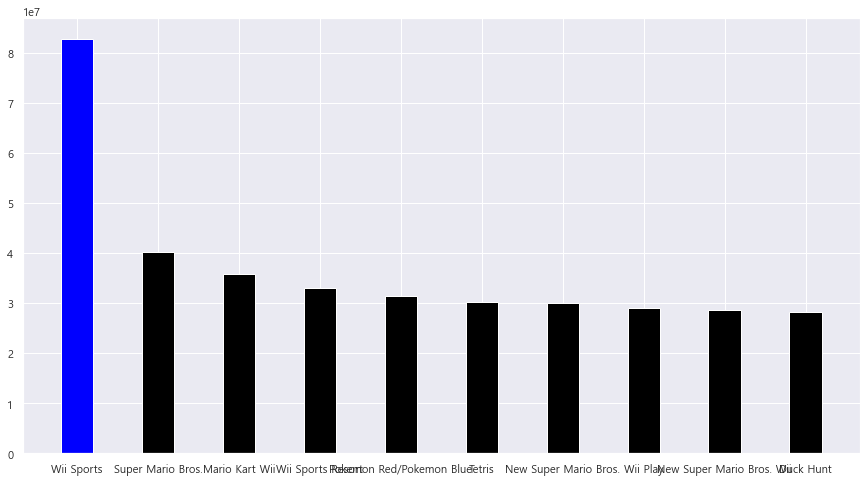

In [61]:
colors = ['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

plt.bar(df_top10['Name'],df_top10['Sales_sum'], color = colors, width = 0.4)

plt.rc('xtick', labelsize = 9)

Will Sports가 압도적으로 판매량(출고량)이 높은 것을 확인할 수 있다.

### 3-3: Platform 비교

top 10 내의 Platform은 무엇이 가장 많은지를 시각화하였다.

In [62]:
freq = df_top10['Platform'].value_counts().rename_axis('Platform').reset_index(name='counts')
freq

,Platform,counts
0,Wii,5
1,GB,2
2,NES,2
3,DS,1


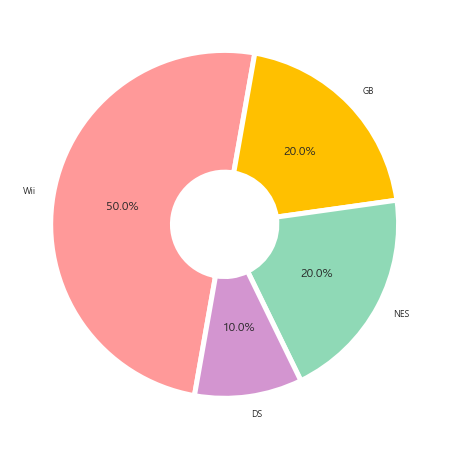

In [63]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(freq['counts'], labels=freq['Platform'], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

10개 게임의 플랫폼 중 Wii가 가장 많았고(5개, 50%), 그 뒤를 NES와 GB가 이었다(각각 2개, 20%). DS도 하나 존재하였다(10%)

### 3-4: Publisher 비교

사실 위 표에서 알 수 있듯, top10의 Publisher가 모두 닌텐도(Nintendo)였다.

때문에 이를 파이 차트로 시각화하는 선에서 마무리하였다.

In [64]:
freq_pub = df_top10['Publisher'].value_counts().rename_axis('Publisher').reset_index(name='counts')
freq_pub

,Publisher,counts
0,Nintendo,10


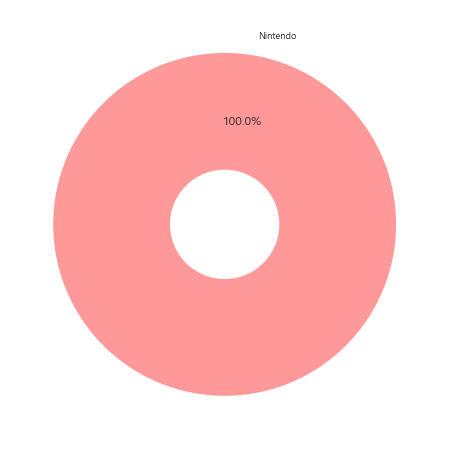

In [65]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(freq_pub['counts'], labels=freq_pub['Publisher'], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

### 3-5: Genre 비교

top10의 장르는 어떤게 많을까? 한번 살펴보았다.

In [66]:
freq_gr = df_top10['Genre'].value_counts().rename_axis('Genre').reset_index(name='counts')
freq_gr

,Genre,counts
0,Platform,3
1,Sports,2
2,Shooter,1
3,Role-Playing,1
4,Puzzle,1
5,Misc,1
6,Racing,1


위 결과는 생각보다 다양하게 나왔기 때문에, 바 그래프로 표현해보기로 하였다.

<BarContainer object of 7 artists>

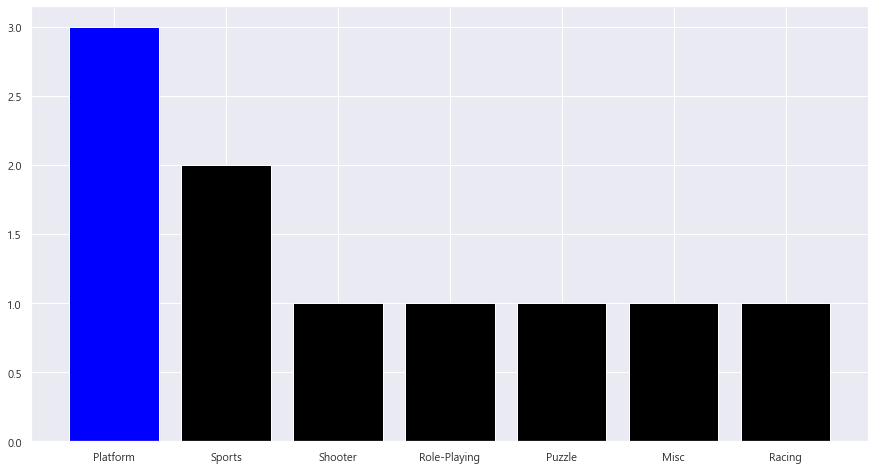

In [69]:
colors = ['blue', 'black', 'black', 'black', 'black', 'black', 'black']

plt.rc('xtick', labelsize=11)

plt.bar(freq_gr['Genre'], freq_gr['counts'], color = colors)

Platform Genre가 가장 많았고(3개), 그 다음으로는 Sports가 많았으며(2개), 나머지 장르들은 다양하게 하나씩 존재하였다.

## 선택분석1: Platform별 판매량에 차이가 있을까?

게임은 다양한 플랫폼을 기반으로 만들어진다.

그렇다면 특별히 판매량이 높은 플랫폼이 있을까?

이를 알아보기 위해 Platform별 총 판매량을 비교해보았다.

In [70]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [71]:
# 플랫폼과 지역 전체 판매량 추출

df_pf = df[["Platform", "Sales_sum"]]

In [72]:
df_pf

,Platform,Sales_sum
0,DS,40000.0
1,Wii,180000.0
2,PSP,20000.0
3,DS,40000.0
4,PS3,250000.0
...,...,...
16236,GC,200000.0
16237,PSP,10000.0
16238,PS3,790000.0
16239,PSV,380000.0


In [73]:
# 플랫폼 별 총 판매량을 계산하고,
# 총 판매량이 높은 플랫폼 순으로 정렬

df_pf = df_pf.groupby('Platform').sum().reset_index()
df_pf = df_pf.sort_values(by='Sales_sum', ascending=False).reset_index(drop=True)

In [74]:
df_pf

,Platform,Sales_sum
0,PS2,1.222440e+09
1,X360,9.685900e+08
2,PS3,9.467400e+08
3,Wii,9.001500e+08
4,DS,8.171900e+08
5,PS,7.251600e+08
6,GBA,3.047600e+08
7,PSP,2.908400e+08
8,PS4,2.757800e+08
9,GB,2.544300e+08


위의 데이터프레임은 플랫폼 별 총 판매량을 내림차순으로 정렬한 것이다.

가장 판매량이 높은 플랫폼은 PS2로 나타났고, 그 뒤를 X360, PS3, Wii가 이었다.

이 중 top 10을 뽑아 표로 나타내면 다음과 같다.

In [75]:
df_pf_top10 = df_pf.head(10).reset_index(drop=True)

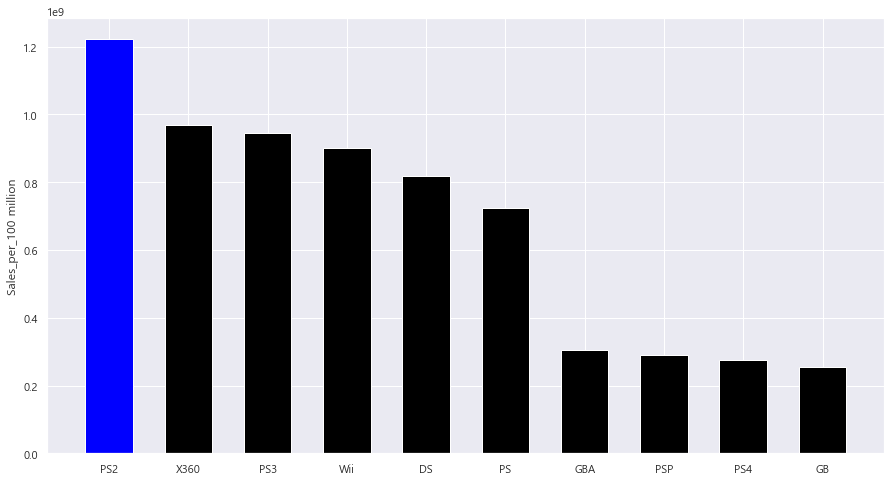

In [76]:
colors = ['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

plt.bar(df_pf_top10['Platform'],df_pf_top10['Sales_sum'], color = colors, width = 0.6)

plt.ylabel('Sales_per_100 million')

plt.rc('xtick', labelsize = 15)

보면 몇몇 플랫폼들에게서 판매량의 차이가 두드러지게 발생함을 확인할 수 있다.

### 결론: 플랫폼 별 판매량의 차이가 존재하지만, 몇몇 그룹별로 판매량이 비슷한 플랫폼이 있다.

그런데 문득 궁금해졌다. 판매량이 높은 플랫폼은 발매된 게임 수도 많을까?

## 선택분석 2: 판매량이 높은 플랫폼과 발매량이 높은 플랫폼 비교

그래서 발매량이 높은 플랫폼 순으로 정렬해 상위 10개를 뽑았다.

In [77]:
df_pf_cnt = df['Platform'].value_counts().rename_axis('Platform').reset_index(name='counts')

In [78]:
df_pf_cnt = df_pf_cnt.sort_values(by=['counts'], ascending=False).reset_index(drop = True)

In [79]:
df_pf_cnt

,Platform,counts
0,DS,2127
1,PS2,2121
2,PS3,1299
3,Wii,1284
4,X360,1231
5,PSP,1193
6,PS,1185
7,PC,935
8,XB,799
9,GBA,784


In [80]:
df_pf_cnt10 = df_pf_cnt.head(10).reset_index(drop=True)

In [81]:
df_pf_cnt10

,Platform,counts
0,DS,2127
1,PS2,2121
2,PS3,1299
3,Wii,1284
4,X360,1231
5,PSP,1193
6,PS,1185
7,PC,935
8,XB,799
9,GBA,784


위 결과를 그래프로 나타내면 다음과 같다.

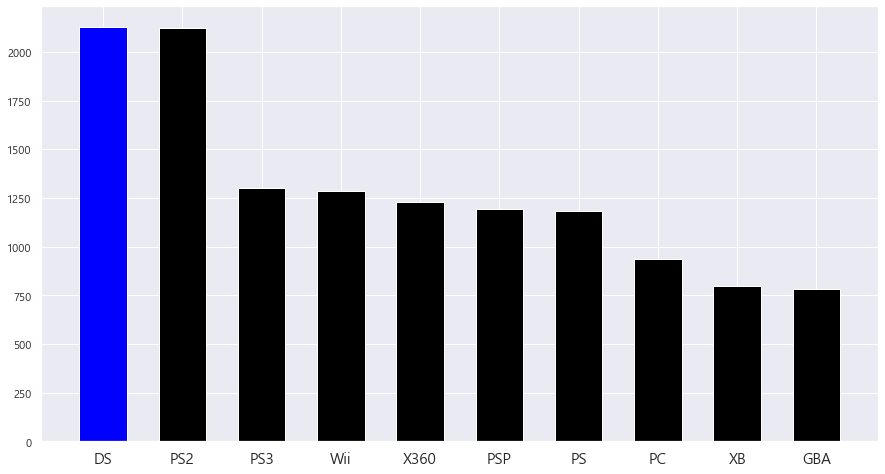

In [82]:
colors = ['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

plt.bar(df_pf_cnt10['Platform'],df_pf_cnt10['counts'], color = colors, width = 0.6)

plt.rc('xtick', labelsize = 15)

이제 이 두 결과를 붙여보기로 했다.

왼쪽에는 판매량순으로 정렬한 플랫폼을, 오른쪽에는 발매량순으로 정렬한 플랫폼을 붙여보았다.

In [83]:
df_pf_top10 = df_pf_top10.drop(['Sales_sum'], axis=1)
df_pf_cnt10 = df_pf_cnt10.drop(['counts'], axis=1)

In [84]:
df_pf_top10 = df_pf_top10.rename(columns={'Platform' : 'Platform_Sales'})
df_pf_cnt10 = df_pf_cnt10.rename(columns = {'Platform' : 'Platform_Counts'})

In [85]:
result4 = pd.concat([df_pf_top10, df_pf_cnt10], axis=1)

In [86]:
result4

,Platform_Sales,Platform_Counts
0,PS2,DS
1,X360,PS2
2,PS3,PS3
3,Wii,Wii
4,DS,X360
5,PS,PSP
6,GBA,PS
7,PSP,PC
8,PS4,XB
9,GB,GBA


그래프와 표를 비교해봤을 때, PS2는 판매량이 높은 만큼 발매량도 많았다(판매량 1위, 발매량 2위. 발매량 1위와 큰 차이 없음)

DS의 경우, 발매량은 가장 높았으나 판매량은 그에 미치지 못하였다(판매량 5위, 발매량 1위)

그렇지만 전체적으로 봤을 때, 판매량이 높은 플랫폼이 발매량도 높았다. 상위10개를 각각 뽑아냈을 때, 둘 모두에 포함되는 플랫폼이 8개였다.

### 결론: 전채적으로 봤을 때, 판매량이 높은 게임은 발매량도 높다.

## 최종 분석 결론: 다음 분기에 어떤 게임을 설계해야 할까?

첫 번째 분석과 두 번째 분석을 살펴보면, 일본을 제외한 지역에서는 Action 장르와 Sports, Shooter 장르가 강세를 보이고 있다. 

또한 가장 최근(2000년대 초반 ~ 2010년대 후반)에는 Action 장르가 유행하였고, PlayStation시리즈와 DS(Nintendo DS)가 플랫폼으로 많이 사용됨을 볼 수 있다.

전체 게임을 대상으로 본다면 PS2 플랫폼의 게임들의 총 판매량이 가장 많았고, 발매량도 1위랑 큰 차이 없이 2번째로 많았다.

또한 전작인 PS도 총 판매량과 발매량 상위 10위에 들었고 PS2를 이은 PS3이 발매량, 판매량 모두 3위를 차지하였으나, PS4의 경우 발매량은 top10에 들지 못했지만 판매량은 9위를 차지하였다. 

이를 볼 때 PS시리즈, 그 중에서도 2와 3이 총 판매량과 발매량에서 강세를 보인다고 할 수 있다.

하지만, 전체 판매량이 높은 10개의 게임을 비교해보면, 모두 Nintendo의 게임이고 Wii Sports의 판매량이 압도적으로 높음이 나타난다.

Platform 또한 절반을 Wii가 차지하였다.

Wii의 경우, 전체 판매량과 발매량이 4위를 차지하기도 하였다.

여기서 주목할만한 점은 많은 게임이 PS시리즈로 발매되지만, 오히려 판매량 top10의 게임들 중에선 Wii 플랫폼의 판매량이 높다는 점이다. 

그리고 장르의 경우, 각 나라별로 선호하는 장르 top3에 모두 Sports가 포함되면서 판매량 top10게임에서도 Sports가 2위를 차지하였다.

따라서 다음 분기에 게임을 설계한다면, 

- Platform은 Wii
- Genre는 Sports
- Publisher는 Nintendo

인 게임을 설계하는 것이 판매량에 유리할 것으로 보인다.